# Data Wrangling
Will be done in 3 different ways
- Manually download data
- Use requests API
- consume twitter api
---

### Configure Workspace

In [ ]:
import pandas as pd, numpy as np

In [ ]:
import tweepy
import requests
from tqdm.auto import tqdm
import json

### Manually Downloaded

- Download the file from udacity 
- read it using `pd.read_csv()`

In [ ]:
tweets_enhanced = 'twitter-archive-enhanced.csv'
df_tweets_archive = pd.read_csv(tweets_enhanced)
df_tweets_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Using Requests pkg
- send a GET HTTP Request
- write its content in a file

In [ ]:
images_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
imgs_preds_file = images_predictions_url.split('/')[-1]

image_request = requests.get(images_predictions_url)
req_content = image_request.content

open(file=imgs_preds_file, mode='wb').write(req_content)

images_preds_df = pd.read_csv(imgs_preds_file, sep='\t')
images_preds_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Consuming API
- Consume Twiiter API fetching the tweets
- Fetching tweets from `twitter-archive-enahnced.csv` that exist in fetched tweets from step 01


In [ ]:
CONSUMER_KEY, CONSUMER_SECRET = "HIDDEN", "HIDDEN"
OAUTH_TOKEN, OAUTH_TOKEN_SECRET = "HIDDEN", "HIDDEN"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
from tqdm.auto import tqdm


tweets_lst, no_tweets_lst = [], []
tweets_dict = []

for tweet_id in tqdm(df_tweets_archive['tweet_id'], leave=False, 
                     desc='fetching tweets by ID'):
    try:
        tweets_lst.append(api.get_status(tweet_id))
        tweets_dict.append(tweets_lst[-1])
    except:
        no_tweets_lst.append(tweet_id)

print(f'Length of fetched tweets: {len(tweets_lst)}')
print(f'Length of not fetched tweets: {len(no_tweets_lst)}')

Rate limit reached. Sleeping for: 784
Rate limit reached. Sleeping for: 783


Length of fetched tweets: 2331
Length of not fetched tweets: 25


In [ ]:
with open(file='tweepy_response.txt', encoding='utf-8', mode='w') as f:
        f.write(json.dumps(tweets_dict, indent=4))

tweets = []
# with open('tweepy_response.txt', encoding='utf-8', mode='r') as json_:  
    # all_tweets = json.loads(json_)
for tweet in tweets_dict:
    tweet_id = tweet['id']
    tweet_ = tweet['text']
    url_ = tweet_[tweet_.find('https'):]
    favorite_count = tweet['favorite_count']
    retweet_count = tweet['retweet_count']
    followers_count = tweet['user']['followers_count']
    friends_count = tweet['user']['friends_count']
    tweet_source = tweet['source']
    source = tweet_source[tweet_source.find('rel="nofollow">') + 15:-4]
    retweeted_status = tweet['retweeted_status'] = tweet.get('retweeted_status', 'Original tweet')
    if retweeted_status == 'Original tweet':
        url = url_
    else:
        retweeted_status = 'This is a retweet'
        url = 'This is a retweet'

    tweets.append({'tweet_id': str(tweet_id),
                    'favorite_count': int(favorite_count),
                    'retweet_count': int(retweet_count),
                    'followers_count': int(followers_count),
                    'friends_count': int(friends_count),
                    'url': url,
                    'source': source,
                    'retweeted_status': retweeted_status})
        
cols = ['tweet_id', 'favorite_count', 'retweet_count',
        'followers_count', 'friends_count','source',
        'retweeted_status', 'url']
tweet_json = pd.DataFrame(tweets, columns=cols)
print(tweet_json.info(), tweet_json.head(), sep='\n---------------\n')
tweet_json.to_csv('tweets.json.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB
None
---------------
             tweet_id  favorite_count  ...  retweeted_status                      url
0  892420643555336193           34963  ...    Original tweet  https://t.co/MgUWQ76dJU
1  892177421306343426           30279  ...    Original tweet  https://t.co/aQFSeaCu9L
2  891815181378084864           22778  ...    Original tweet  https://t.co/r0YlrsGCgy
3  89168955727985

In [ ]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34963,7341,8984609,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30279,5477,8984609,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22778,3621,8984609,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38206,7522,8984609,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36489,8109,8984609,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [ ]:
tweet_json.source.sort_values()

1701              TweetDeck
948               TweetDeck
950               TweetDeck
951               TweetDeck
953               TweetDeck
               ...         
1009    Vine - Make a Scene
1616    Vine - Make a Scene
1289    Vine - Make a Scene
1604    Vine - Make a Scene
1442    Vine - Make a Scene
Name: source, Length: 2331, dtype: object

In [ ]:
tweet_json.source.nunique()

4

In [ ]:
tweet_json = pd.read_csv('tweepy_response.txt', sep='\t')

# Data Assessment

## Visually assessing
- display dataframes using EXCEL, `df.head()` to get better insights about how the data looks

## Programatically assessing 
- Displaying dataframes info and first 5 rows from each
- displaying number of null values & num of duplicated rows
- display statistical data
- number of distinct observations
- display unique vals

Check below this h-line for our fetched observations

---

#### Twitter Archived CSV issues
1. we found that 'in_reply_to_status_id' & 'in_reply_to_user_id' columns had only 78 rows out of 2356, the rest are NaNs
2. timestamp is not DateTime but was saved as object(str)
3. retweeted_status_timestamp was not DateTime but saved as str
4. retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamps are missing data totalling of (181/2356) only available
5. doggo, floofer, pupper & puppo columns are mostly filled with Nones and not as empty objectss.
6. This df doesn't contain any missing values, however, the date_time field
type is an object instead of DateTime, however, it may have duplicates
7. No duplicate rows given that there are no unique ids in every table

#### Images predictions df from Requests package
1. After prefatory assessments, images' table extracted from the requests python pkg. It has no quality issues in terms of data types or missing data
2. There are approximatly 70 duplicated URLs as compared to the tweet id col in twitter_archive_enhanced df (2075 ids VS  2009 urls)
3. The images predictions df has 3 different predictions {p1, p2, p3} with 3 different accuracies {p1_conf, p2_conf, p3_conf}, so either there are 
dog breeds not included in 1st and 2nd predictions or they're not written the 
 same way or my best hypothesis is that the authors might have used 3 different NN
4. there are no duplicates based on there are no unique ids in every table


#### Tweets API data
1. nothing to note here
2. there are no duplicate rows given that there are no unique ids in every table


- At the end, it was decided to merge all the dataframes as an approach to one of the tidiness issues found in the different dataframes, and clean data by dropping extra and duplicate columns as well as duplicate rows. changing cols datatypes to the most fitting datatypes 

## Visual assessing of dataframes

In [ ]:
df_tweets_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [ ]:
images_preds_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [ ]:
tweet_json = pd.read_csv('tweets.json.csv')
tweet_json

,Unnamed: 0,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,0,892420643555336193,34963,7341,8984609,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,1,892177421306343426,30279,5477,8984609,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,2,891815181378084864,22778,3621,8984609,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,3,891689557279858688,38206,7522,8984609,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,4,891327558926688256,36489,8109,8984609,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...,...
2326,2326,666049248165822465,93,38,8984576,16,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,2327,666044226329800704,258,122,8984576,16,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,2328,666033412701032449,107,39,8984576,16,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,2329,666029285002620928,117,41,8984576,16,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


## Programatic assessing of dataframes

- Tweets archive dataframe

In [ ]:
print(df_tweets_archive.info(), df_tweets_archive.head(), sep='\n----------------------\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
print(f'Null values #: {df_tweets_archive.isnull().sum()}',
      f'Duplicated rows #: {sum(df_tweets_archive.duplicated())}')

Null values #: tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64 Duplicated rows #: 0


In [ ]:
print(df_tweets_archive.describe())

           tweet_id  ...  rating_denominator
count  2.356000e+03  ...         2356.000000
mean   7.427716e+17  ...           10.455433
std    6.856705e+16  ...            6.745237
min    6.660209e+17  ...            0.000000
25%    6.783989e+17  ...           10.000000
50%    7.196279e+17  ...           10.000000
75%    7.993373e+17  ...           10.000000
max    8.924206e+17  ...          170.000000

[8 rows x 7 columns]


In [ ]:
print(df_tweets_archive.nunique())

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64


- Image predicitons dataframe

In [ ]:
print(images_preds_df.info(), images_preds_df.head(), sep='\n----------------------\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
----------------------
             tweet_id  ... p3_dog
0  666020888022790149  ...   True
1  666029285002620928  ...   True
2  666033412701032449  ...   True
3  666044226329800704  ...   True
4  666049248165822465  ...   True

[5 rows x 12 columns]


In [ ]:
print(f'Null values #:\n {images_preds_df.isnull().sum()}',
      f'Duplicated rows #: {sum(images_preds_df.duplicated())}')

Null values #:
 tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64 Duplicated rows #: 0


In [ ]:
print(images_preds_df.describe())

           tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01


In [ ]:
print(images_preds_df.nunique())

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64


- formatted tweets dataframe -from twitter api-

In [ ]:
print(tweet_json.info(), tweet_json.head(), sep='\n----------------------\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2331 non-null   int64 
 1   tweet_id          2331 non-null   int64 
 2   favorite_count    2331 non-null   int64 
 3   retweet_count     2331 non-null   int64 
 4   followers_count   2331 non-null   int64 
 5   friends_count     2331 non-null   int64 
 6   source            2331 non-null   object
 7   retweeted_status  2331 non-null   object
 8   url               2331 non-null   object
dtypes: int64(6), object(3)
memory usage: 164.0+ KB
None
----------------------
   Unnamed: 0            tweet_id  ...  retweeted_status                      url
0           0  892420643555336193  ...    Original tweet  https://t.co/MgUWQ76dJU
1           1  892177421306343426  ...    Original tweet  https://t.co/aQFSeaCu9L
2           2  891815181378084864  ...    Original tweet  http

In [ ]:
print(f'Null values #: \n{tweet_json.isnull().sum()}',
      f'Duplicated rows #: {sum(tweet_json.duplicated())}')

Null values #: 
Unnamed: 0          0
tweet_id            0
favorite_count      0
retweet_count       0
followers_count     0
friends_count       0
source              0
retweeted_status    0
url                 0
dtype: int64 Duplicated rows #: 0


In [ ]:
print(tweet_json.describe())

        Unnamed: 0      tweet_id  ...  followers_count  friends_count
count  2331.000000  2.331000e+03  ...     2.331000e+03         2331.0
mean   1165.000000  7.419079e+17  ...     8.984578e+06           16.0
std     673.046061  6.823170e+16  ...     5.600787e+01            0.0
min       0.000000  6.660209e+17  ...     8.984068e+06           16.0
25%     582.500000  6.782670e+17  ...     8.984563e+06           16.0
50%    1165.000000  7.182469e+17  ...     8.984575e+06           16.0
75%    1747.500000  7.986692e+17  ...     8.984610e+06           16.0
max    2330.000000  8.924206e+17  ...     8.984610e+06           16.0

[8 rows x 6 columns]


In [ ]:
print(tweet_json.nunique())

Unnamed: 0          2331
tweet_id            2331
favorite_count      1989
retweet_count       1664
followers_count       19
friends_count          1
source                 4
retweeted_status       2
url                 2133
dtype: int64


- since ratings are based on unconstrained human input, we dig deeper in it

In [ ]:
print('Unique rating numerator values')
print(np.sort(df_tweets_archive['rating_numerator'].unique()))
print('Unique rating numerator value counts')
print(df_tweets_archive['rating_numerator'].value_counts())

Unique rating numerator values
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   17   20   24   26   27   44   45   50   60   75   80   84
   88   99  121  143  144  165  182  204  420  666  960 1776]
Unique rating numerator value counts
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64


In [ ]:
print('Unique rating denominator values')
print(np.sort(df_tweets_archive['rating_denominator'].unique()))
print('Unique rating denominator value counts')
print(df_tweets_archive['rating_denominator'].value_counts())

Unique rating denominator values
[  0   2   7  10  11  15  16  20  40  50  70  80  90 110 120 130 150 170]
Unique rating denominator value counts
10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


# Data Cleaning

## TO WRITE IT LATER
- Merge dataframes
- Remove cols with missing vals & unrelated cols
- fix type of tweet_id and image_num in df
- Combine all dog breeds into a `dog_type` col


#### Tidiness Issue
- [DEFINE] Merge the dataframe df_twitter_archive, dataframe image_preds_df, and tweet_json dataframes .
- [CODE] USING pyhton command CONCAT we can merge out datasets


In [ ]:
twitter = df_tweets_archive.copy()
image = images_preds_df.copy()
json = tweet_json.copy()
# Merge dataframes [TIDYNESS]
df = pd.concat([twitter, image, json], axis=1)

- [TEST] print df.info() & df.head()

In [ ]:
print(df.info(), df.head(), sep='\n-----------------------------\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### QUALITY Issue
- [Define] remove retweet columns as well as duplicated cols (if there is any).
- [Code] Delete the column using Command DROP , for column Axis =1


In [ ]:
df.drop(['retweeted_status'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

- [Test] print df.head()

In [ ]:
# drop retweeted data [QUALITY]
df.info()
# drop duplicates [QUALITY]
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.0,8.924206e+17,34963.0,7341.0,8984609.0,16.0,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,1.0,8.921774e+17,30279.0,5477.0,8984609.0,16.0,Twitter for iPhone,https://t.co/aQFSeaCu9L
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2.0,8.918152e+17,22778.0,3621.0,8984609.0,16.0,Twitter for iPhone,https://t.co/r0YlrsGCgy
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,3.0,8.916896e+17,38206.0,7522.0,8984609.0,16.0,Twitter for iPhone,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,4.0,8.913276e+17,36489.0,8109.0,8984609.0,16.0,Twitter for iPhone,https://t.co/0g0KMIVXZ3


#### TIDYNESS Issue
- [Define] Drop duplicated cols (if there is any).
- [Code] Delete the column using Command `df.loc[:, ~]` , for column Axis =1


In [ ]:
# drop duplicated cols [TIDYNESS]
df = df.loc[:,~df.columns.duplicated()]

- [Test] print df.head()

In [ ]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.0,34963.0,7341.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,1.0,30279.0,5477.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2.0,22778.0,3621.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,3.0,38206.0,7522.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,4.0,36489.0,8109.0


#### Quality Issue
- [Define] remove columns with too many missing values.
- [Code] Delete the column using Command DROP , for column Axis =1


In [ ]:
# Remove cols with too many missing vals [TIDYNESS]
df = df[df.retweeted_status_id.isnull()].copy()
cols_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id',
                'img_num', 'friends_count', 'url', 'followers_count',
                'in_reply_to_status_id', 'in_reply_to_user_id',
                'retweeted_status_user_id',  'retweeted_status_id',
                'retweeted_status_timestamp']
df.drop(cols_to_drop, axis=1, inplace=True)

- [Test] print `df.head()`

In [ ]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,tweet_id,favorite_count,retweet_count,source
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.0,8.924206e+17,34963.0,7341.0,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,1.0,8.921774e+17,30279.0,5477.0,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2.0,8.918152e+17,22778.0,3621.0,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,3.0,8.916896e+17,38206.0,7522.0,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,4.0,8.913276e+17,36489.0,8109.0,Twitter for iPhone


#### Quality Issue
- [Define] Wrong Datatypes should be be corrected 
    - tweet_id should be an int
    - jpg_url should bee str
    - src should be category
    - Timestamp should be in DateTime format
- [Code] we can convert the dataype using .ASTYPE() method


In [ ]:
#Tweet ID (int > str) [QUALITY]
df['tweet_id'] = df['tweet_id'].astype(str)
# Image (should be str) [QUALITY]
df['jpg_url'] = df['jpg_url'].astype(str)
# Soures typecasting
df['source'] = df['source'].astype('category')
# Correct timestamp type in df [QUALITY]
df['timestamp'] = df['timestamp'].str.slice(start=0, stop=-6)
df['timestamp'] = pd.to_datetime(df['timestamp'], format = "%Y-%m-%d %H:%M:%S")

- [Test] print `df.info()`


In [ ]:
df.info()


#### QUALITY Issue
- [Define] Some of the dogs names are from stopwords
- [Code] Remove Names that belong to the set of stopwords or Nones or Nans


In [ ]:
# drop invalid dog names [QUALITY]
df.name.replace(['None', 'a', 'an', 'very','the', 'not', 'quite', 'actually'], 'None' , inplace = True)
mask = df.name.str.islower()
df.loc[mask, 'name'] = np.nan
df = df[df['name'] != 'None'].copy()

- [Test] print `df.head()` to print names of the dogs

In [ ]:
print(df.head())

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Tucker     10
           ..
Banditt     1
Acro        1
Dewey       1
Jeffri      1
Gunner      1
Name: name, Length: 931, dtype: int64


#### Quality Issue
- [Define] Ratings numerators all of them were not consistent, same applies for the denomenators 
- [Code] standardize ratings of the dogs by just dividing both by each other to have a float values


In [ ]:
# standard dog ratings
df['rating_numerator'] = df['rating_numerator'].astype(float)
df['rating_denominator'] = df['rating_denominator'].astype(float)
df['rating'] = df['rating_numerator'] / df['rating_denominator']

- [Test] check printed out values

In [ ]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,favorite_count,retweet_count,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.0,34963.0,7341.0,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,1.0,30279.0,5477.0,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2.0,22778.0,3621.0,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,3.0,38206.0,7522.0,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,4.0,36489.0,8109.0,1.2


#### Quality Issue
- [Define] doggo, floofer, pupper, puppo these 4 variables shoule be combined into one categorical variable Dog Type.
Define
- [Code] Extract the data of the column using and add them to dog_type col


In [ ]:
df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1315
1,None,None,None,puppo,20
2,None,None,pupper,None,135
3,None,floofer,None,None,5
4,doggo,None,None,None,47
5,doggo,None,pupper,None,6


In [ ]:
df.doggo.replace([np.NaN, 'None'], '', inplace=True)
df.puppo.replace([np.NaN, 'None'], '', inplace=True)
df.floofer.replace([np.NaN, 'None'], '', inplace=True)
df.pupper.replace([np.NaN, 'None'], '', inplace=True)
# Place all dog categores n one col
df['dogtype'] = df.doggo + df.floofer + df.pupper + df.puppo

df.loc[df.dogtype == 'doggopupper', 'dog_type'] = 'doggo, pupper'
df.loc[df.dogtype == 'doggopuppo', 'dog_type'] = 'doggo, puppo'
df.loc[df.dogtype == 'doggofloofer', 'dog_type'] = 'doggo, floofer'
df.dogtype.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopupper'],
      dtype=object)

In [ ]:
for idx, row in df.iterrows():
    if 'doggoNoneNoneNone' in row['dogtype']:
        df.loc[idx, 'dog_type'] = 'doggo'
    elif 'NoneNoneNonepuppo' in row['dogtype']:
        df.loc[idx, 'dog_type'] = 'puppo'
    elif 'NoneNonepupperNone' in row['dogtype']:
        df.loc[idx, 'dog_type'] = 'pupper'
    elif 'NoneflooferNoneNone' in row['dogtype']:
        df.loc[idx, 'dog_type'] = 'floofer'
    elif 'NoneNoneNoneNone' in row['dogtype']:
        df.loc[idx, 'dog_type'] = None
    elif 'doggo' in row['dogtype']:
        df.loc[idx, 'dog_type'] = 'doggo'
    elif 'puppo' in row['dogtype']:
        df.loc[idx, 'dog_type'] = 'puppo'
    elif 'pupper' in row['dogtype']:
        df.loc[idx, 'dog_type'] = 'pupper'
    elif 'floofer' in row['dogtype']:
        df.loc[idx, 'dog_type'] = 'floofer'
    else:
        df.loc[idx, 'dog_type'] = 'multiple'
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,favorite_count,retweet_count,rating,dogtype,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.0,34963.0,7341.0,1.3,,multiple
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,1.0,30279.0,5477.0,1.3,,multiple
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2.0,22778.0,3621.0,1.2,,multiple
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,3.0,38206.0,7522.0,1.3,,multiple
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,4.0,36489.0,8109.0,1.2,,multiple


In [ ]:
df.drop(['dogtype'], axis=1, inplace=True)
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

- [Test] Check out the df after cleaning and removing extra dog stages

In [ ]:
df.head()
# check ['doggo', 'floofer', 'pupper', 'puppo'] cols were dropped

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,favorite_count,retweet_count,rating,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.0,34963.0,7341.0,1.3,multiple
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,1.0,30279.0,5477.0,1.3,multiple
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2.0,22778.0,3621.0,1.2,multiple
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,3.0,38206.0,7522.0,1.3,multiple
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,4.0,36489.0,8109.0,1.2,multiple


#### Store the cleaned dataset

In [ ]:
df.to_csv('twitter_cleaned.csv', encoding='utf-8', index=False)

# Visualize and store

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

#### Insight #01 
Dog stages frequency 

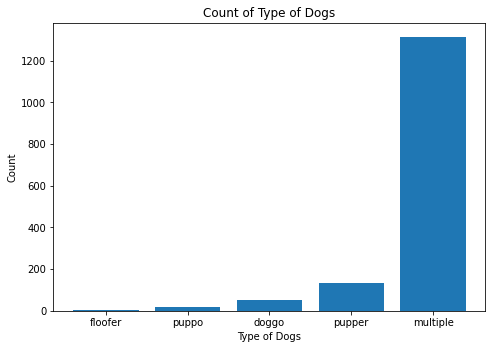

In [ ]:
# Count of dog types
count=list(df['dog_type'].value_counts().sort_values())
label=list(df['dog_type'].value_counts().sort_values().index)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,count)
plt.xlabel("Type of Dogs")
plt.ylabel("Count")
ax.set_title("Count of Type of Dogs")
plt.show()

#### Insight #02

The traffic of the number of tweets is declining over time

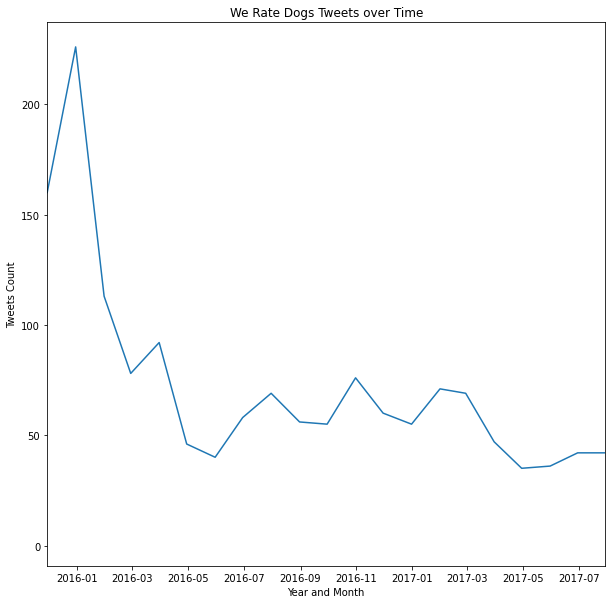

In [ ]:
df.timestamp = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()


# Plotting time vs. tweets
plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

##### Insight #03
The most common name was Charlie, followeed by 2nd cluster (Oliver, lucy, cooper) followed by the 3rd cluster of (lola, penny, tucker)

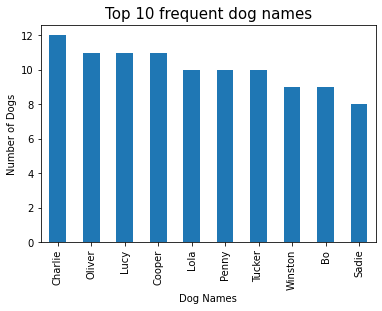

In [ ]:
df['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.savefig('most_frequent_names');

##### Insight #04
The most used sources for the tweets was from iPhone, followed by web browser, vine and sweetdeck were 3rd and 4th respectively

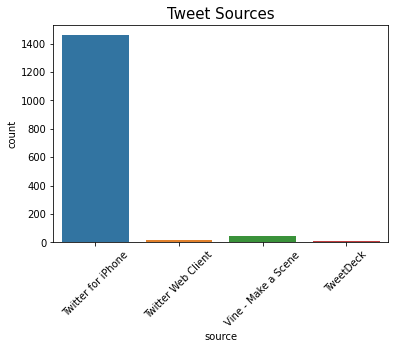

In [ ]:
# df['source'].value_counts()
df['source'] = df['source'].replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',  '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], ['Twitter for iPhone', 'Vine - Make a Scene', 'Twitter Web Client', 'TweetDeck'])
# df['source'].value_counts()
sns.countplot(data=df, x='source')
plt.title('Tweet Sources', size=15)
plt.xticks(rotation=45)
plt.savefig('most_used_twitter_source');